# <font color='red'>Exploratory Data Analysis (EDA) </font>

> *EDA is applied to investigate the data and summarize the key insights. It will give you the basic understanding of your data, it's distribution, null values and much more.Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.*



---



# <font color='green'> Import Libraries </font>


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:


import warnings
warnings.filterwarnings('ignore')



**"ignore"** never print matching warnings.




---



# <font color='purple'> Reading The Data </font>


In [ ]:
dataFrame=pd.read_csv("/content/SupermarketRetailDataset.csv")

In [ ]:
dataFrame.head() 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


The **head()** function is used to get the first n rows.

This function returns the first n rows for the object based on position.

In [ ]:
dataFrame.shape

(9994, 13)

The **shape of a DataFrame** is a tuple of array dimensions that tells the number of rows and columns of a given DataFrame

In [ ]:
dataFrame.describe() 

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The **describe()** method returns description of the data in the DataFrame. This is summary actually.

If the DataFrame contains numerical data, the description contains these information for each column

In [ ]:
dataFrame.isnull().sum()  

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**isnull().sum()**returns the number of missing values in the dataset.

In [ ]:
dataFrame.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


The **info() method** prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [ ]:
dataFrame.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')



---



# <font color='pink'>  Dropping Unwanted Columns </font> 

In [ ]:
dataFrame.duplicated().sum()

17

The **duplicated()** method returns a Series with True and False values (Boolean) that describe which rows in the DataFrame are duplicated and not. We are finding their sum.

In [ ]:
dataFrame.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

The **nunique()** method returns the number of unique values for *each column*. By specifying the column axis *( axis='columns' ), the nunique() method searches column-wise and returns the number of unique values for each row.*




---



*dataFrame.duplicated().sum()* returns us 17. So, there are 17 duplicate entries and *let us drop them*



In [ ]:
dataFrame.drop_duplicates(subset=None,keep='first',inplace=True)

DataFrame.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False)[source]
Return DataFrame with duplicate rows removed.
Considering certain columns is optional. Indexes, including time indexes are ignored.

subsetcolumn label or sequence of labels, optional

    Only consider certain columns for identifying duplicates, by default use all of the columns.


keep{‘first’, ‘last’, False}, default ‘first’

    Determines which duplicates (if any) to keep. 
    - first : 
    Drop duplicates except for the first occurrence. 

    inplacebool, default False

    Whether to modify the DataFrame rather than creating a new one.


In [ ]:
dataFrame.drop_duplicates(inplace= True)

*Return DataFrame with duplicate rows removed.*

In [ ]:
dataFrame.duplicated().sum()

0

We prove that remove the duplicate rows.

In [ ]:
dataFrame.drop(["Postal Code"], axis=1,inplace= True)

Dropping unwanted colums. **drop.inplace=True means** the operation would work on the **original object**. axis=1 means we are dropping the column, not the row.

In pandas **axis = 0 refers to** horizontal axis or **rows** and **axis = 1** refers to vertical axis or **columns**

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1013.3+ KB


In [ ]:
dataFrame.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

After drop Postal Code column, as you can see there is no Poscal Code column anymore.

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   Country       9944 non-null   object 
 3   City          9944 non-null   object 
 4   State         9944 non-null   object 
 5   Region        9944 non-null   object 
 6   Category      9944 non-null   object 
 7   Sub-Category  9944 non-null   object 
 8   Sales         9944 non-null   float64
 9   Quantity      9944 non-null   int64  
 10  Discount      9944 non-null   float64
 11  Profit        9944 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1009.9+ KB




---



# <font color='magenta'>  Correlation Between the Data  </font>

> *A correlation is a statistical measure of the relationship between two variables. The measure is best used in variables that demonstrate a linear relationship between each other. The fit of the data can be visually represented in a scatterplot.*



In [38]:
corr = dataFrame.corr()

Pandas **dataFrame.corr()** is used to find the *pairwise correlation of all columns in the Pandas Dataframe in Python.* Any *NaN values are automatically excluded.* Any non-numeric data type or columns in the Dataframe, it is ignored.

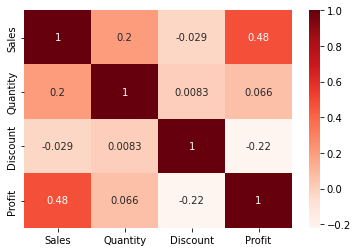

In [41]:
sns.heatmap(corr,annot=True,cmap='Reds')

**annot: If True**, *write the data value in each cell.* **cmap** is *colormap*


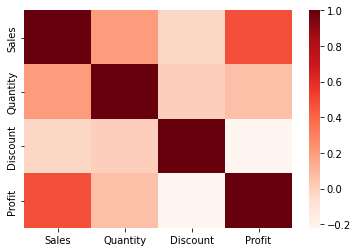

In [42]:
sns.heatmap(corr,annot=False,cmap='Reds')

**annot: If False**, *dont write the data value in each cell.*

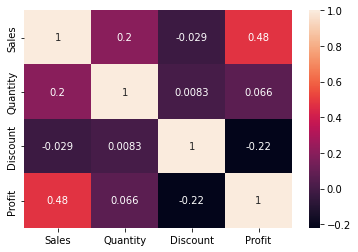

In [45]:
sns.heatmap(dataFrame.corr(), annot=True)

If we dont give cmap value, this is the default version



---



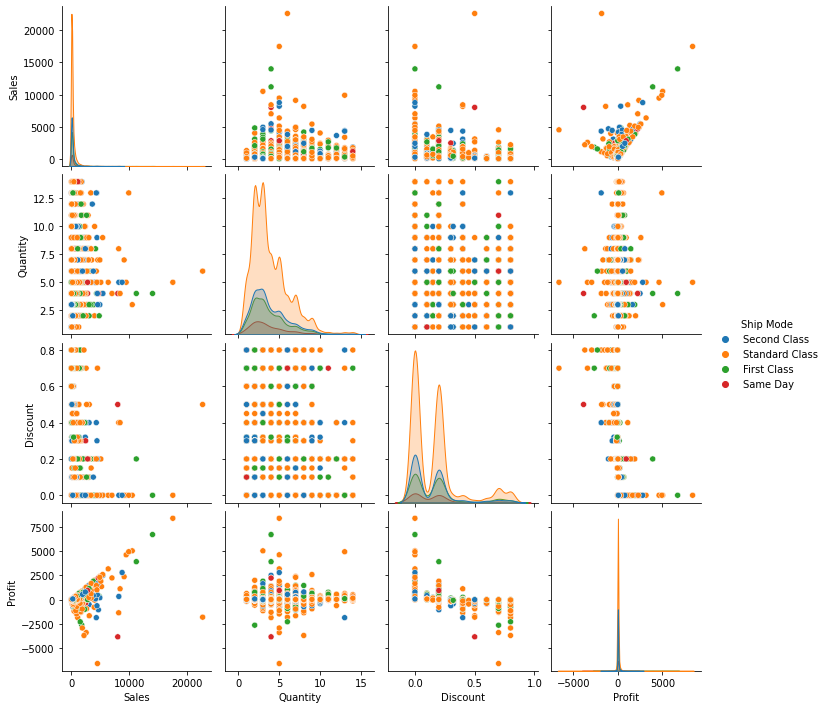

In [47]:
sns.pairplot(dataFrame, hue = 'Ship Mode')

Plot pairwise relationships in a dataset.
seaborn.pairplot() :

> To plot multiple pairwise bivariate distributions in a dataset, you can use the .pairplot() function.

> The diagonal plots are the univariate plots, and this displays the relationship for the (n, 2) combination of variables in a DataFrame as a matrix of plots.


In [52]:
dataFrame['Ship Mode'].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

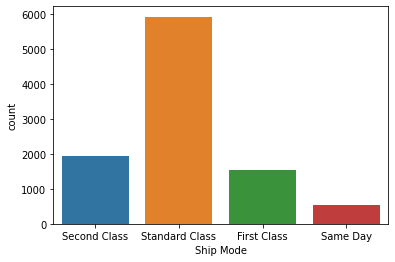

In [54]:
sns.countplot(x=dataFrame['Ship Mode'])

From the above plot we can conclude that Standard Class has highest number of Ship Mode.

In [49]:
dataFrame.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

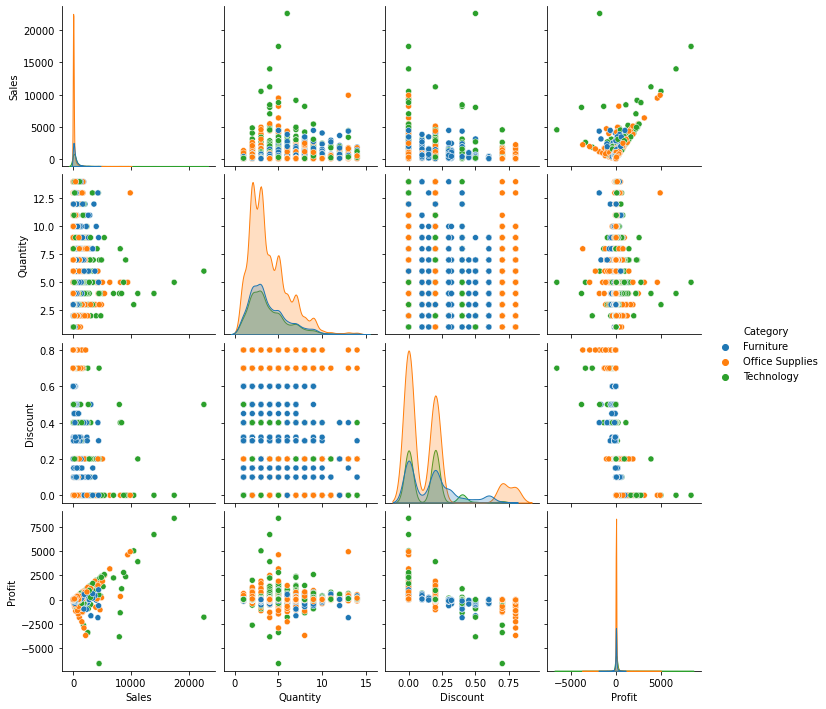

In [51]:
sns.pairplot(dataFrame, hue = 'Category')

In [53]:
dataFrame['Category'].value_counts()

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

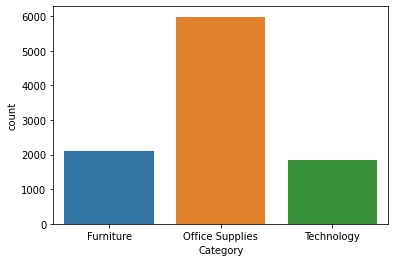

In [55]:
sns.countplot(x=dataFrame['Category'])

From the above plot we can conclude that Office Supplies Category has highest number of sales.

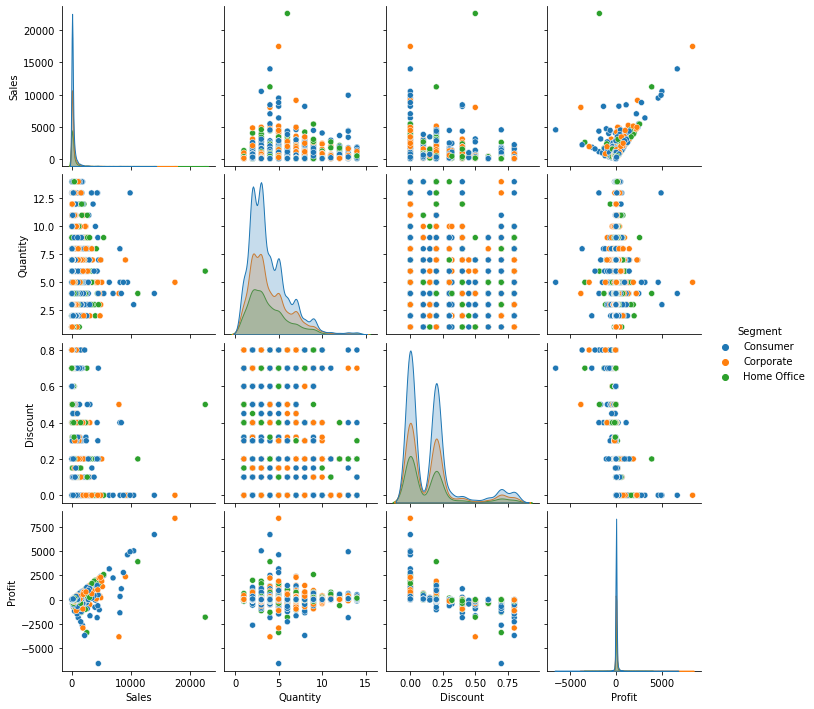

In [56]:
sns.pairplot(dataFrame,hue = 'Segment')  

In [57]:
dataFrame['Segment'].value_counts()

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

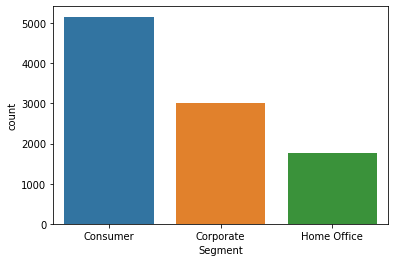

In [58]:
sns.countplot(x=dataFrame['Segment'])

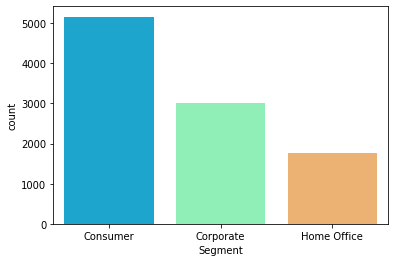

In [59]:
sns.countplot(x = 'Segment',data = dataFrame, palette = 'rainbow')

Show the counts of observations in each categorical bin using bars.

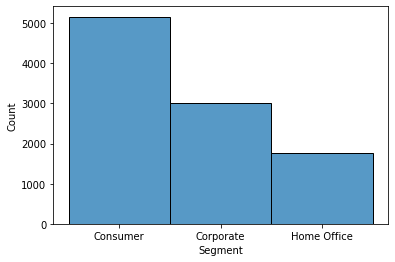

In [64]:
sns.histplot(x = 'Segment',data = dataFrame)

From the above plot we can conclude that Consumer has highest number of Segment.

In [67]:
dataFrame["Sub-Category"].value_counts()


Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

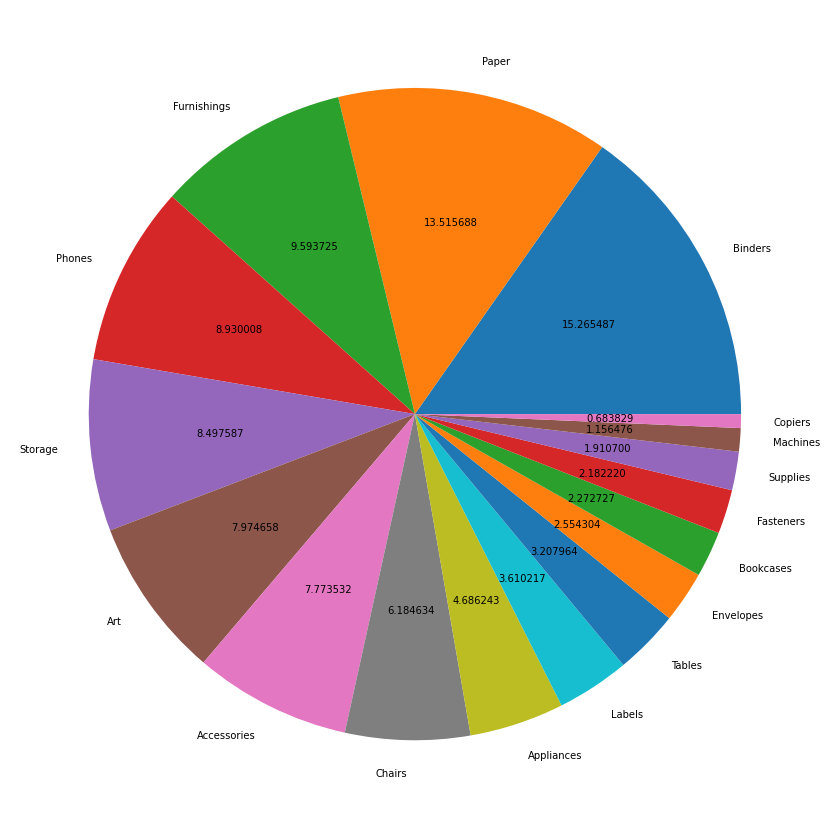

In [73]:
plt.figure(figsize=(15,15))
plt.pie(dataFrame["Sub-Category"].value_counts(), labels= dataFrame["Sub-Category"].value_counts().index, autopct ="%2f")
plt.show()

Here, Sub-Category with highest sale is Binder, followed by Paper and Furnishings as second and third respectively.



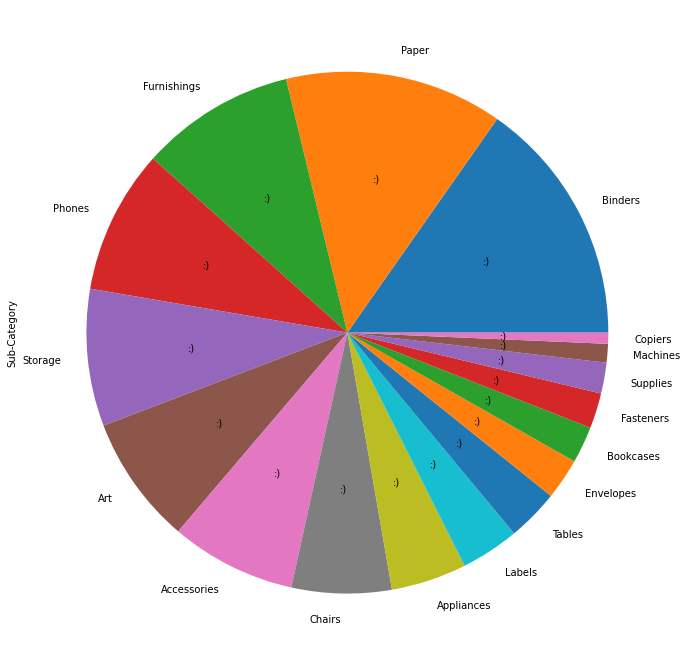

In [75]:
plt.figure(figsize=(15,12))
dataFrame['Sub-Category'].value_counts().plot.pie(autopct=':)')
plt.show()

Maximum are from Binders, Paper, Furnishings, Phones, Storage, Art, Accessories and Minimum from Copiers, Machines, Suppliers

In [76]:
dataFrame['State'].value_counts()

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

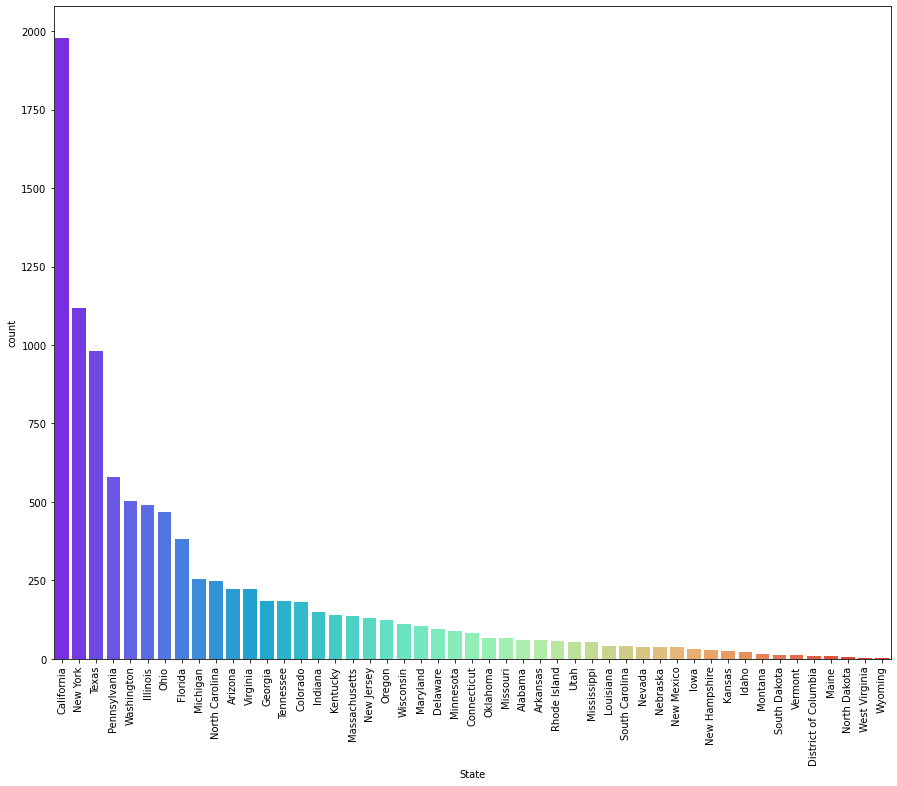

In [85]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=dataFrame,palette='rainbow',order=dataFrame['State'].value_counts().index) #rocket_r or rainbow used for palette 
#,order=dataFrame['State'].value_counts().index for order so add after rainbow
plt.xticks(rotation=90) #Get or set the current tick locations and labels of the x-axis.
plt.show()



Highest number of buyers are from California and New York

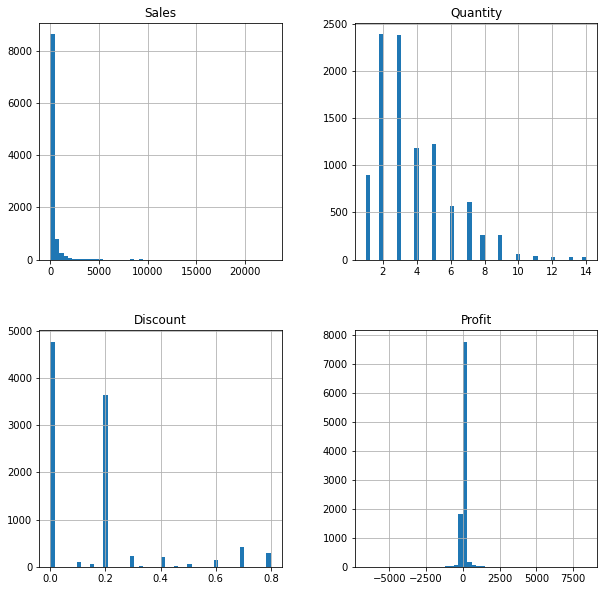

In [89]:
dataFrame.hist(figsize=(10,10),bins=50)
plt.show()

A histogram is a representation of the distribution of data. This function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.

*bins* should be the number of bars you want to show in your histogram plot.


    Most customers tends to buy quantity of 2 and 3
    Discount give maximum is 0 to 20 percent



In [108]:
st_profit=dataFrame.groupby(["State"])["Profit"].sum().nlargest(20)

In [109]:
st_profit

State
California       76215.9705
New York         74006.1552
Washington       33368.2375
Michigan         24428.0903
Virginia         18597.9504
Indiana          18382.9363
Georgia          16250.0433
Kentucky         11199.6966
Minnesota        10823.1874
Delaware          9977.3748
New Jersey        9772.9138
Wisconsin         8401.8004
Rhode Island      7285.6293
Maryland          7031.1788
Massachusetts     6785.5016
Missouri          6436.2105
Alabama           5786.8253
Oklahoma          4853.9560
Arkansas          4008.6871
Connecticut       3511.4918
Name: Profit, dtype: float64

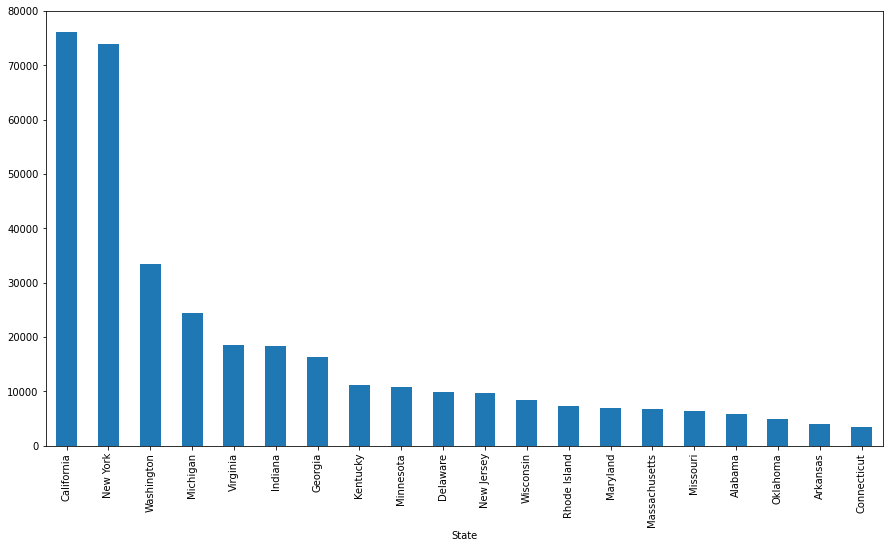

In [110]:
plt.figure(figsize=(15,8))
st_profit.plot.bar()

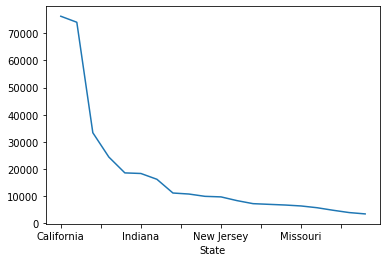

In [111]:
st_profit.plot.line()

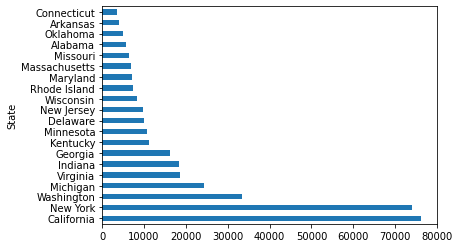

In [112]:
st_profit.plot.barh()

In [113]:
st_sales=dataFrame.groupby(["Category"])["Sales"].sum().nlargest(20)

In [114]:
st_sales

Category
Technology         835774.6410
Furniture          740568.6663
Office Supplies    718256.0700
Name: Sales, dtype: float64

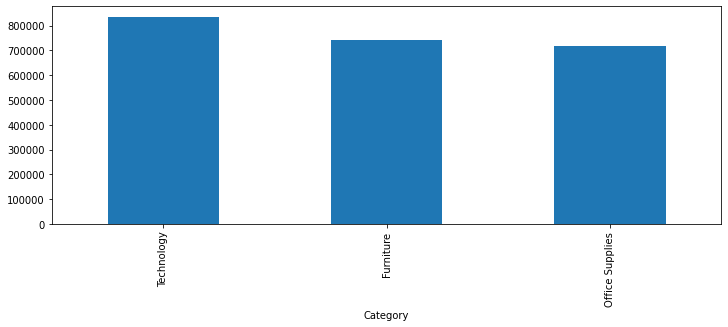

In [115]:
plt.figure(figsize=(12,4))
st_sales.plot.bar()

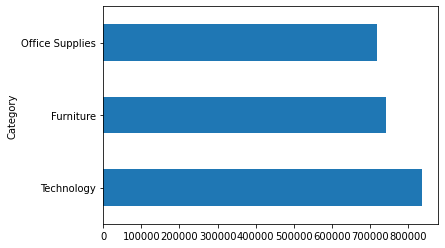

In [116]:
st_sales.plot.barh()

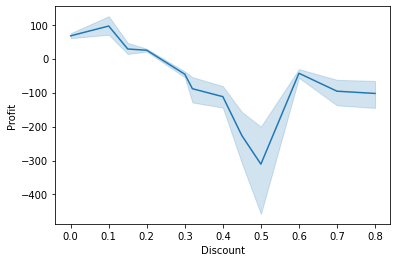

In [117]:
sns.lineplot(data=dataFrame, x="Discount", y= "Profit")

So we can see that when discount increases profit decreases

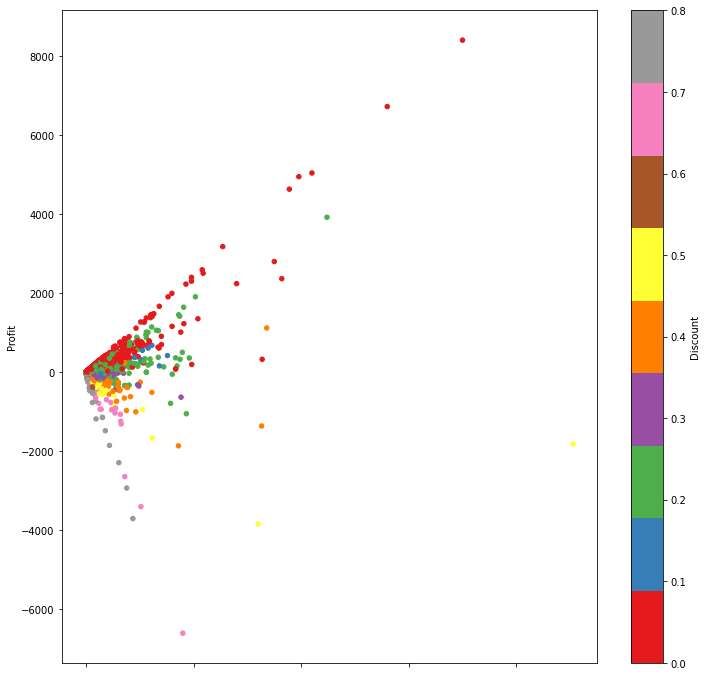

In [124]:
dataFrame.plot(kind="scatter",x="Sales",y="Profit", c="Discount", colormap="Set1",figsize=(12,12))

In this scatter plot we can clearly see that more sales does not mean more profit. It depends on discount as well. 
When Sales is high and there is low discount, the profit margin is higher.

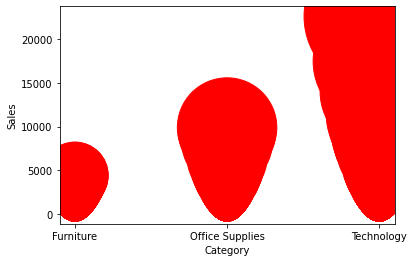

In [123]:
dataFrame.plot.scatter(x = 'Category', y = 'Sales', s = 'Sales', c = 'red');



---



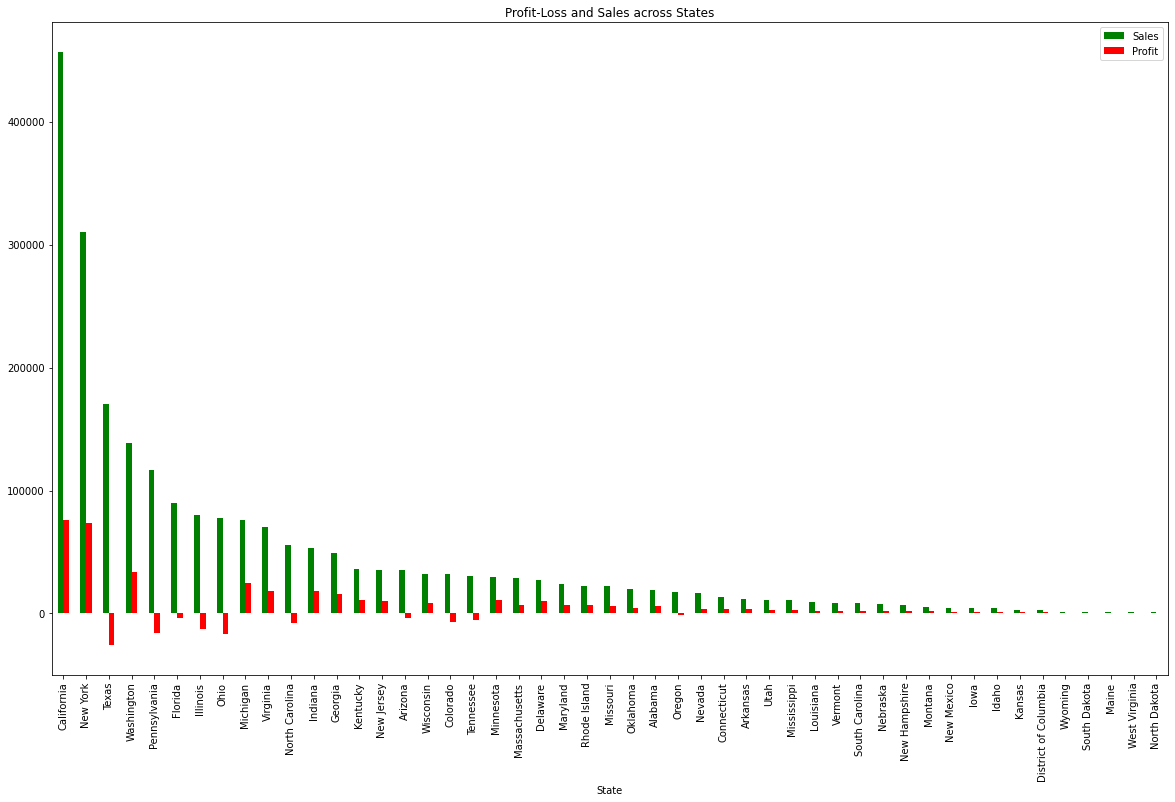

In [130]:
data1= dataFrame.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
data1[:].plot.bar(color = ["Green","Red"], figsize=(20,12))
plt.title("Profit-Loss and Sales across States")
plt.show()

California and New York generate more profit compared to the other states.

    High profit is for California, New york
    Loss is for Texas, Pennsylvania, Ohio


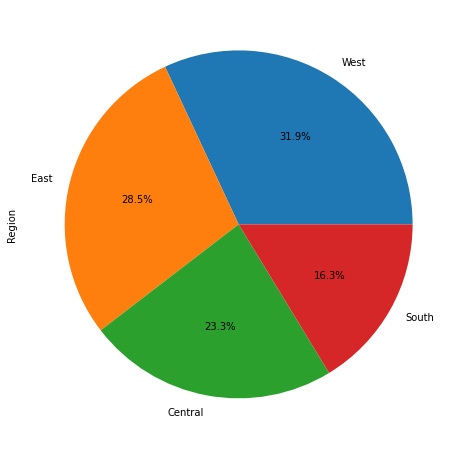

In [133]:
plt.figure(figsize=(10,8))
dataFrame['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()



---



# <font color='brown'> Profit vs Discount  </font>



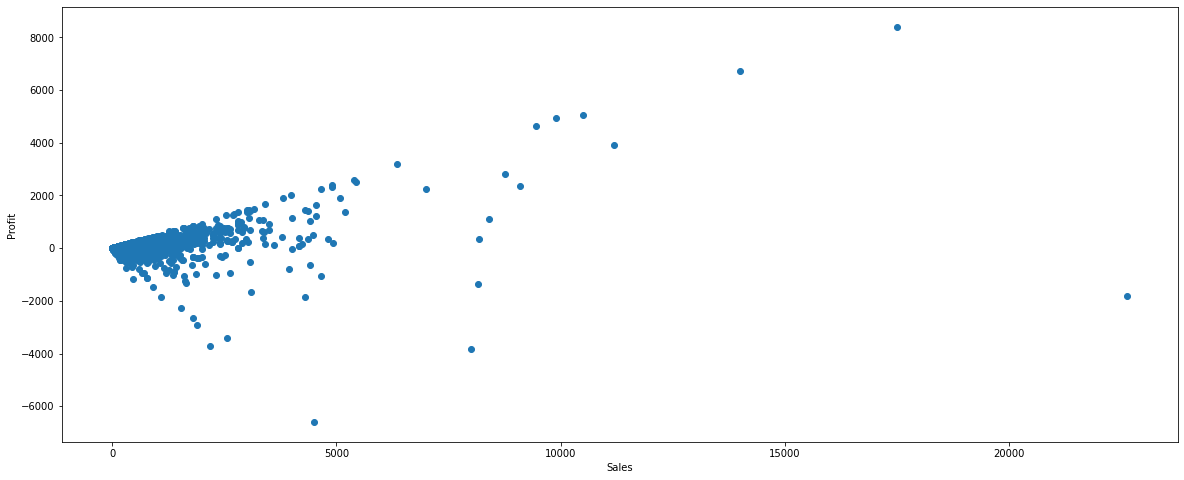

In [134]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(dataFrame['Sales'],dataFrame['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

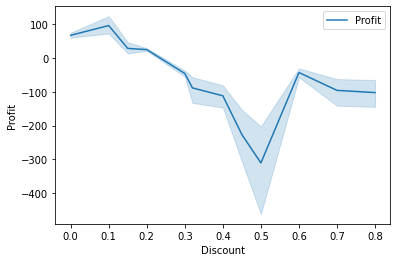

In [135]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=dataFrame)
plt.legend()
plt.show()

No correlation between profit and discount


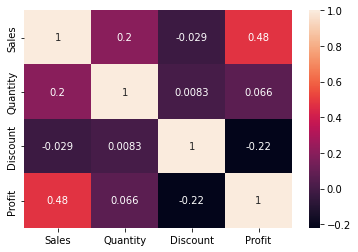

In [136]:
sns.heatmap(dataFrame.corr(), annot=True)



---





# <font color='maroon'>  Profit vs Quantity  </font>

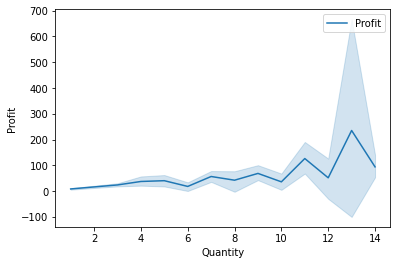

In [137]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=dataFrame)
plt.legend()
plt.show()



A legend is an area describing the elements of the graph. In the matplotlib library, there’s a function called legend() which is used to Place a legend on the axes.

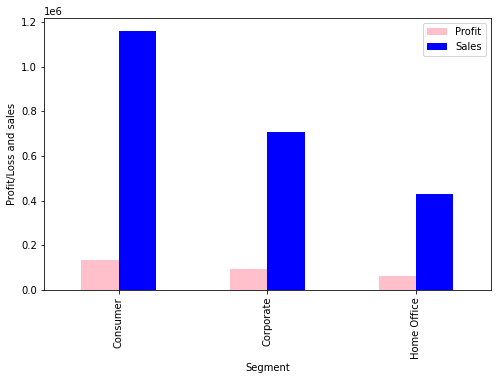

In [138]:
dataFrame.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()


    Profit and sales are maximum in Consumer segment and minimum in Home Office segment




---



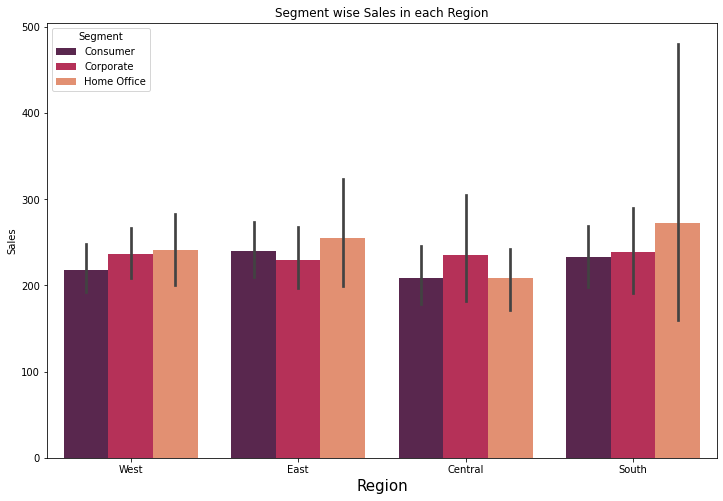

In [139]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=dataFrame,hue='Segment',order=dataFrame['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()




    Segment wise sales are almost same in every region




---



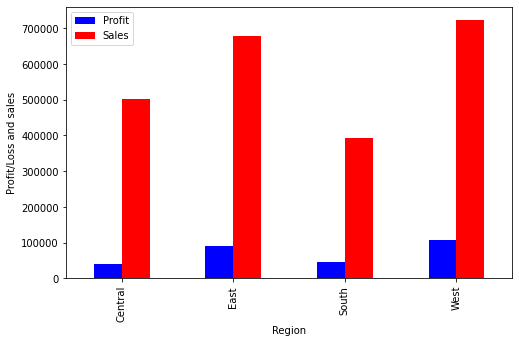

In [140]:
dataFrame.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()



    Profit and sales are maximum in west region and minimum in south region




---



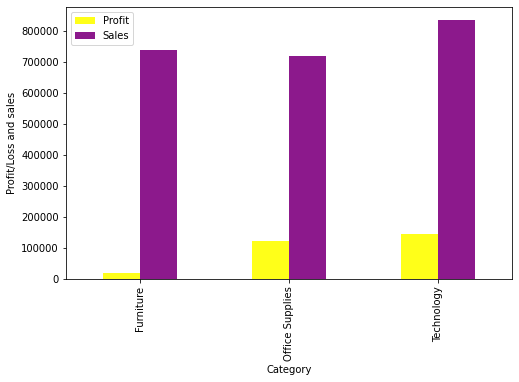

In [141]:
dataFrame.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()



Weak areas where you can work to make more profit?

    Technology and Office Supplies have high profit.
    Furniture have less profit



---



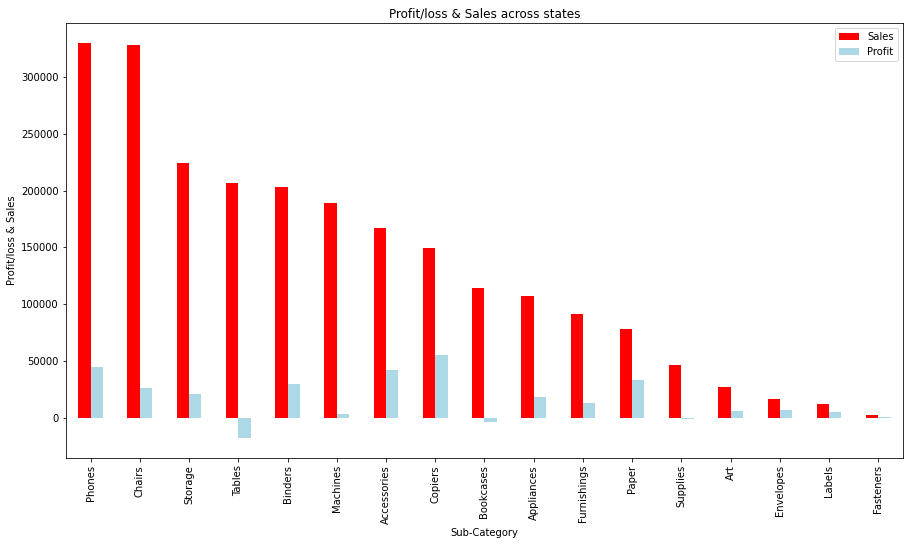

In [142]:
ps = dataFrame.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()



*   Phones sub-category have high sales.

*   Chairs have high sales but less profit compared to phones

*   Tables and Bookmarks sub-categories facing huge loss






---



# <font color='orange'>  Profit Loss and Sales Across Region  </font>


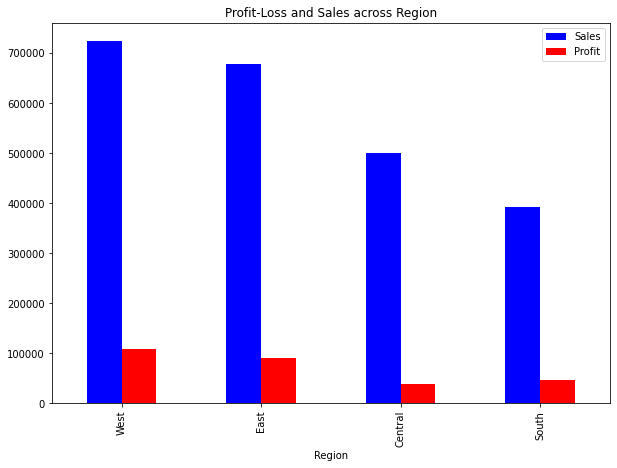

In [131]:
data1= dataFrame.groupby("Region")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
data1[:].plot.bar(color = ["Blue","Red"], figsize=(10,7))
plt.title("Profit-Loss and Sales across Region")
plt.show()


**Conclusion:**

    The western region generates highest profit.
    California, NewYork and Washington generates the most sales compared to the other places.
    The central region generates lowest profit.
    Texas, Pennsylvenia, Florida, Illinois, Ohio and some other states are generating loss with high sale. So we need to give some attention towards them.

Therefore, we have to work more on California and New York. Increase the sales in these states by reducing sales in states like Texas, Florida, Ohio. By decreasing the discount rates in Central region we can increase the profit. Finally we should increase the sale of Office Supplies category as they contribute more.
